# Import Dataset

In [1]:
import pandas as pd

df = pd.read_csv('source/dataset_60_balanced.csv')
df.head()

,Unnamed: 0,class,course,speed,row,column,hour_sin,hour_cos,day_sin,day_cos,target
0,0,0.000000e+00,0.857143,0.333333,0.885942,0.71250,0.066987,0.250000,0.617482,0.008127,324
1,1,1.000000e+00,0.428571,0.333333,0.885942,0.69375,0.629410,0.982963,0.721083,0.037020,324
2,2,1.000000e+00,0.714286,0.000000,0.888594,0.70625,0.933013,0.750000,0.670064,0.020016,324
3,3,1.000000e+00,0.714286,0.000000,0.888594,0.70625,0.933013,0.750000,0.670064,0.020016,324
4,4,1.110223e-16,0.428571,0.333333,0.885942,0.69375,0.982963,0.629410,0.712712,0.033837,324


In [2]:
df.shape

(2397000, 11)

In [84]:
columns = ['class', 'course','speed','row','column','hour_sin','hour_cos','day_sin','day_cos']
X = df[columns]
Y = df['target']

In [85]:
n_classes = len(Y.unique())

# Split Train and Test

In [111]:
burst = 1000
i = 1
N = 100 # test size per class
cursor = burst
y_train = pd.DataFrame()
y_test =  pd.DataFrame()
X_train = pd.DataFrame()
X_test =  pd.DataFrame()
for c in range(0, n_classes):
    for i in range(0,burst):
        if i < burst - N:
            y_train = y_train.append([Y.loc[burst*c + i]])
            X_train = X_train.append(X.loc[burst*c + i])
        else:
            X_test = X_test.append(X.loc[burst*c + i])
            y_test = y_test.append([Y.loc[burst*c + i]])

In [112]:
y_train.shape, y_test.shape

((2700, 1), (300, 1))

In [113]:
X_train.to_csv('output/X_train_60.csv')
X_test.to_csv('output/X_test_60.csv')
y_train.to_csv('output/y_train_60.csv')
y_test.to_csv('output/y_test_60.csv')

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

classifier = KNeighborsClassifier()
parameters = {  'n_neighbors'   : np.arange(3, 8),
                'weights'       : ['uniform', 'distance'],
                'metric'        : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                'algorithm'     : ['auto', 'ball_tree', 'kd_tree'],
            }
clf = GridSearchCV(classifier, parameters, cv = 5)
clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([3, 4, 5, 6, 7]),
                         'weights': ['uniform', 'distance']})

In [119]:
model = clf.best_estimator_

In [125]:
model

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

# Save the Model

In [120]:
import pickle
pickle.dump(model, open("output/knn.sav", 'wb'))

# Load the saved model

In [121]:
# open a file, where you stored the pickled data
file = open('output/knn.sav', 'rb')

# dump information to that file
loaded_model = pickle.load(file)

# Predict Unseen

In [122]:
y_score = model.predict_proba(X_test)

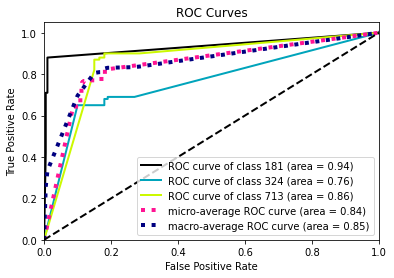

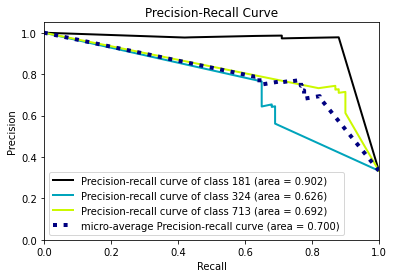

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from scikitplot.metrics import plot_roc,auc
from scikitplot.metrics import plot_precision_recall


# Plot metrics 
plot_roc(y_test.values.ravel(), y_score)
plt.savefig('output/roc.png')
plt.show()
    
plot_precision_recall(y_test.values.ravel(), y_score)
plt.savefig('output/pr.png')
plt.show()

In [133]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_pred = model.predict(X_test)
precision = precision_score(y_test.values.ravel(),y_pred, average='weighted')
recall = recall_score(y_test.values.ravel(),y_pred, average='weighted')
accuracy = accuracy_score(y_test.values.ravel(),y_pred)
print('Precision: ' , precision)
print('Recall: ' , recall)
print('Accuracy: ' , accuracy)

Precision:  0.7841605933606
Recall:  0.7633333333333333
Accuracy:  0.7633333333333333
